In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       9 non-null      object
 1   B       9 non-null      object
 2   C       9 non-null      object
 3   D       9 non-null      int64 
 4   E       9 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 488.0+ bytes


In [18]:
table = pd.pivot_table(df, values='D', index=['A', 'B'], \
                       columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

<AxesSubplot: xlabel='C', ylabel='A-B'>

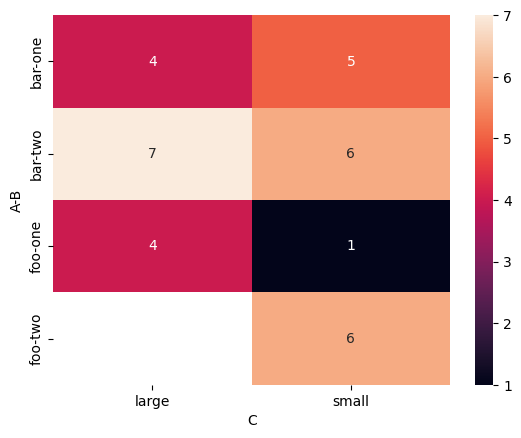

In [19]:
sns.heatmap(table, annot=True)

In [1]:
!pip install mapie

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 573.1 kB/s eta 0:00:00a 0:00:01


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [5]:
regressor = LinearRegression()
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=59)

In [6]:
from mapie.regression import MapieRegressor
alpha = [0.05, 0.32]
mapie = MapieRegressor(regressor)
mapie.fit(X, y)
y_pred, y_pis = mapie.predict(X, alpha=alpha)

In [7]:
from mapie.metrics import regression_coverage_score
coverage_scores = [
    regression_coverage_score(y, y_pis[:, 0, i], y_pis[:, 1, i])
    for i, _ in enumerate(alpha)
]

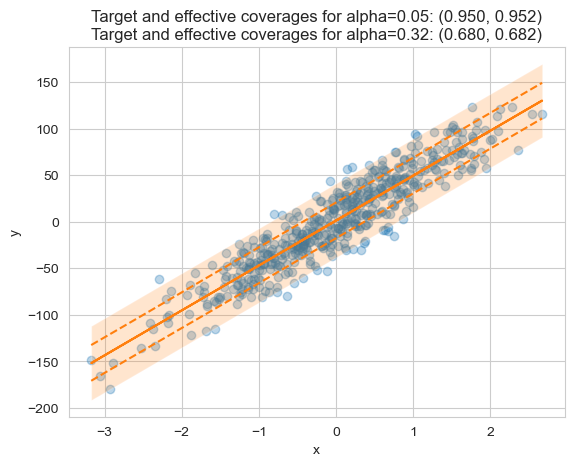

In [9]:
from matplotlib import pyplot as plt
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X, y, alpha=0.3)
plt.plot(X, y_pred, color="C1")
order = np.argsort(X[:, 0])
plt.plot(X[order], y_pis[order][:, 0, 1], color="C1", ls="--")
plt.plot(X[order], y_pis[order][:, 1, 1], color="C1", ls="--")
plt.fill_between(
    X[order].ravel(),
    y_pis[order][:, 0, 0].ravel(),
    y_pis[order][:, 1, 0].ravel(),
    alpha=0.2
)
plt.title(
    f"Target and effective coverages for "
    f"alpha={alpha[0]:.2f}: ({1-alpha[0]:.3f}, {coverage_scores[0]:.3f})\n"
    f"Target and effective coverages for "
    f"alpha={alpha[1]:.2f}: ({1-alpha[1]:.3f}, {coverage_scores[1]:.3f})"
)
plt.show()